##Install & Load Datasets and libraries

In [1]:
!pip install datasets pandas matplotlib seaborn

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

##Load Bitext Dataset

In [11]:
bitext = load_dataset("bitext/Bitext-customer-support-llm-chatbot-training-dataset", split='train')
bitext_df = pd.DataFrame(bitext)
bitext_df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


##Load Customer-Service-for-LLM Dataset

In [12]:
cs_llm = load_dataset("pranav301102/customer-service-for-llm", split='train')
cs_llm_df = pd.DataFrame(cs_llm)
cs_llm_df.head()

,instruction,category,intent,response,text
0,want assistace seeing my bill #12588,INVOICE,check_invoice,Unquestionably! I'm here to assist you in view...,###Instruction: want assistace seeing my bill ...
1,seeing bills from {{Person Name}},INVOICE,check_invoice,I understand your need to access the bills rel...,###Instruction: seeing bills from {{Person Nam...
2,where can i take a quick look at the invoice #...,INVOICE,check_invoice,I'll take care of it! I understand that you wo...,###Instruction: where can i take a quick look ...
3,what do i have to do to give a quick look at m...,INVOICE,check_invoice,I've realized you're seeking a quick way to vi...,###Instruction: what do i have to do to give a...
4,I don't know how I could check my bill from {{...,INVOICE,check_invoice,"I'm on the same wavelength, your confusion abo...",###Instruction: I don't know how I could check...


##Check for missing values

In [19]:
print("Missing values in Bitext:")
print(bitext_df.isnull().sum(), '\n')

print("Missing values in Customer-Service-for-LLM:")
print(cs_llm_df.isnull().sum())

Missing values in Bitext:
flags          0
instruction    0
category       0
intent         0
response       0
length         0
dtype: int64 

Missing values in Customer-Service-for-LLM:
instruction    0
category       0
intent         0
response       0
text           0
length         0
dtype: int64


##Intent Distribution (Both Datasets)

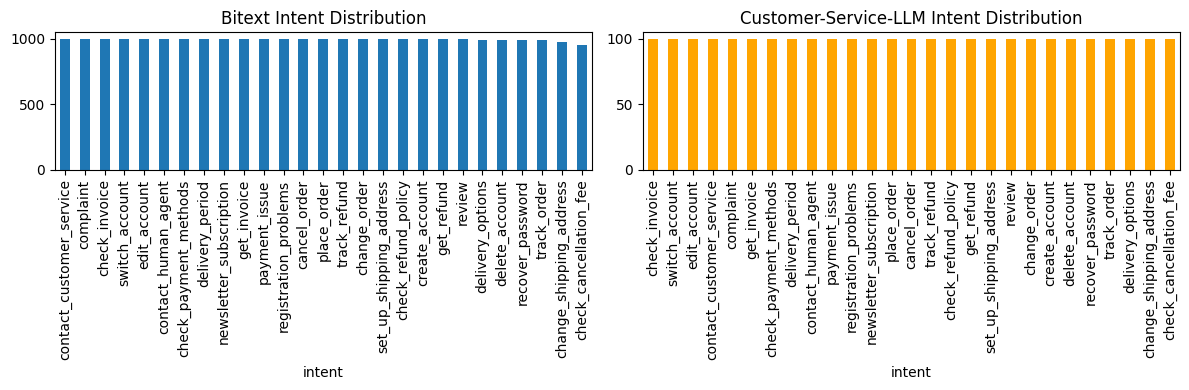

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
bitext_df['intent'].value_counts().plot(kind='bar', title='Bitext Intent Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
cs_llm_df['intent'].value_counts().plot(kind='bar', title='Customer-Service-LLM Intent Distribution', color='orange')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##Top 3 most common intents

In [17]:
# 1. Top 3 most common intents
print("Top 3 Intents in Bitext:")
print(bitext_df['intent'].value_counts().head(3), '\n')

print("Top 3 Intents in Customer-Service-for-LLM:")
print(cs_llm_df['intent'].value_counts().head(3), '\n')

Top 3 Intents in Bitext:
intent
contact_customer_service    1000
complaint                   1000
check_invoice               1000
Name: count, dtype: int64 

Top 3 Intents in Customer-Service-for-LLM:
intent
check_invoice     100
switch_account    100
edit_account      100
Name: count, dtype: int64 



## Category Distribution

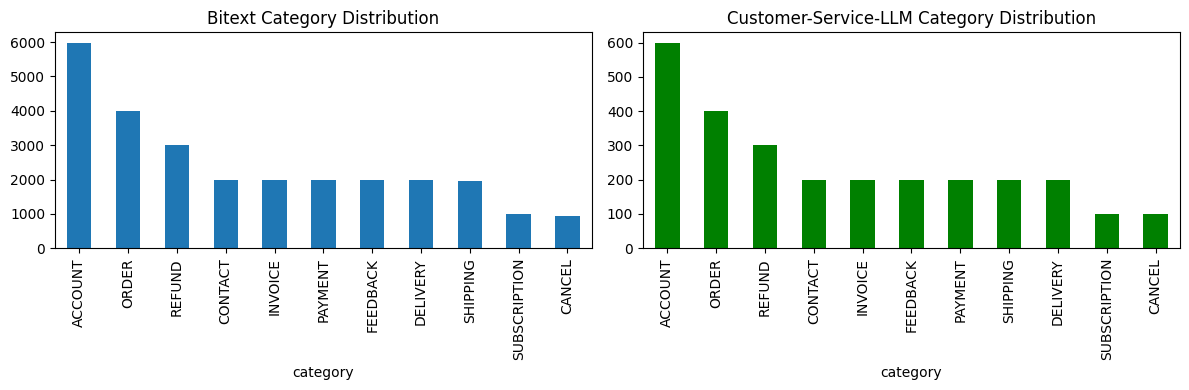

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
bitext_df['category'].value_counts().plot(kind='bar', title='Bitext Category Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
cs_llm_df['category'].value_counts().plot(kind='bar', title='Customer-Service-LLM Category Distribution', color='green')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Query Length Histogram

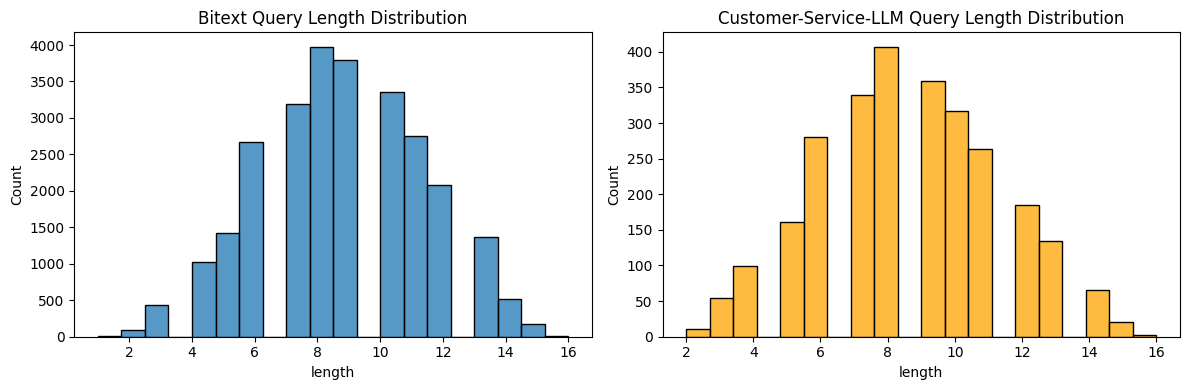

In [15]:
# Add query length column
bitext_df['length'] = bitext_df['instruction'].apply(lambda x: len(x.split()))
cs_llm_df['length'] = cs_llm_df['instruction'].apply(lambda x: len(x.split()))

# Plot histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(bitext_df['length'], bins=20)
plt.title("Bitext Query Length Distribution")

plt.subplot(1, 2, 2)
sns.histplot(cs_llm_df['length'], bins=20, color='orange')
plt.title("Customer-Service-LLM Query Length Distribution")

plt.tight_layout()
plt.show()

##Average query length

In [18]:
bitext_avg_len = bitext_df['length'].mean()
cs_llm_avg_len = cs_llm_df['length'].mean()

print(f"Average Query Length in Bitext: {bitext_avg_len:.2f} words")
print(f"Average Query Length in Customer-Service-for-LLM: {cs_llm_avg_len:.2f} words\n")

Average Query Length in Bitext: 8.69 words
Average Query Length in Customer-Service-for-LLM: 8.60 words



#Dataset Overview

In [22]:
from IPython.display import display, HTML

def show_dataset_summary(name, df):
    num_examples = len(df)
    num_intents = df['intent'].nunique()
    num_categories = df['category'].nunique()

    html = f"""
    <div style="border: 2px solid #2196F3; padding: 16px; border-radius: 10px; background-color: #eef6fc; margin: 10px 0;">
        <h4 style="margin-top: 0;">📁 {name} Dataset Overview</h4>
        <ul style="list-style-type: none; padding-left: 0;">
            <li><b>Total Q&A Pairs:</b> {num_examples}</li>
            <li><b>Unique Intents:</b> {num_intents}</li>
            <li><b>Unique Categories:</b> {num_categories}</li>
        </ul>
    </div>
    """
    display(HTML(html))

# Show summaries
show_dataset_summary("Bitext", bitext_df)
show_dataset_summary("Customer-Service-for-LLM", cs_llm_df)


##Show Example Rows

In [21]:
from IPython.display import display, HTML
import random

def show_example(dataset_name, df):
    row = df[['instruction', 'intent', 'response']].sample(1).iloc[0]
    html = f"""
    <div style="border: 2px solid #4CAF50; padding: 16px; border-radius: 10px; background-color: #f9f9f9; margin: 10px 0;">
        <h4 style="margin-top: 0;">{dataset_name} Example</h4>
        <p><b>🗨️ Instruction:</b> {row['instruction']}</p>
        <p><b>🧠 Intent:</b> {row['intent']}</p>
        <p><b>💬 Response:</b> {row['response']}</p>
    </div>
    """
    display(HTML(html))

# Show one from each
show_example("Bitext", bitext_df)
show_example("Customer-Service-for-LLM", cs_llm_df)